This script empirically solves for the threshold at which firms of varying ability choose to enter a particular market at different sizes. 

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(42)

$\psi_j = \delta_j + c_j$

Equilibrium price:

$$p_{js}^*=c_j+\frac{1}{1-\sigma_{js}^*}$$

Equilibrium market share:

$$\sigma_{js}^*=\frac{e^{\left(\psi_j+\frac{1}{\sigma_{js}^*-1}\right)}}{\sum_{k=1}^{100}e^{\left(\psi_k+\frac{1}{\sigma_{ks}^*-1}\right)}}$$

Equilibrium profit:

$$\pi_{js}^*=M_s\left(\frac{\sigma_{js}^*}{1-\sigma_{js}^*}\right)$$

In [2]:
# 100 firms
talent_thresh = np.random.normal(0,1,100)
talent_thresh_vec = sorted(talent_thresh, reverse=True)
mkt_sizes = (1,6)
profit_dict = {}
profit26_dict = {}
profit46_dict = {}
sigma_dict = {}

"""
restrict to at least 3 firms in each market; this makes convergence almost certain
the issue seems to be that with a large standard deviation, psi dominates sigma
the largest psi can prevent convergence, so the standard deviation needs to be 'small'
"""
# find each firm's equilibrium profit
# for each candidate threshold:
for psi in talent_thresh_vec[2:-3]:
    #print(f"psi: {psi}")
    # no outside option
    nfirms1 = talent_thresh_vec.index(psi) + 1
    nfirms2 = len(talent_thresh_vec) - nfirms1
    print(f"nfirms: {nfirms1},{nfirms2}")
    
    # candidate sigma (share) vectors
    lhs_sigma1_vec = np.repeat(1/(nfirms1+1), nfirms1)
    lhs_sigma2_vec = np.repeat(1/(nfirms2+1), nfirms2)
    
    # sigma (share) vectors
    rhs_sigma1_vec = np.zeros(nfirms1)
    rhs_sigma2_vec = np.zeros(nfirms2)
    
    # compute tolerances
    # use norm of difference between vectors: this is sum of abs of difference
    tol1 = np.linalg.norm(lhs_sigma1_vec-rhs_sigma1_vec, 1)
    tol2 = np.linalg.norm(lhs_sigma2_vec-rhs_sigma2_vec, 1)
    #print(f"tol: {tol1},{tol2}")
    # use counter to track how many iterations for convergence
    counter = 0
    
    # while tolerances are too big
    while (tol1>0.01) or (tol2>0.01):
        # set lhs to be last guess
        lhs_sigma1_vec = rhs_sigma1_vec.copy()
        lhs_sigma2_vec = rhs_sigma2_vec.copy()
        #print(f"lhs: {lhs_sigma1_vec}")
        
        # compute denominators
        denom1_vec = 1 + sum(np.exp(talent_thresh_vec[:nfirms1]+(1/(lhs_sigma1_vec-1))))
        denom2_vec = 1 + sum(np.exp(talent_thresh_vec[nfirms1:]+(1/(lhs_sigma2_vec-1))))
        #print(f"denom: {denom1_vec},{denom2_vec}")
        
        # compute numerators
        num1_vec = np.exp(talent_thresh_vec[:nfirms1]+(1/(lhs_sigma1_vec-1)))
        num2_vec = np.exp(talent_thresh_vec[nfirms1:]+(1/(lhs_sigma2_vec-1)))
        #print(f"numer: {num1_vec},{num2_vec}")
        
        # compute new rhs
        rhs_sigma1_vec = num1_vec/denom1_vec
        rhs_sigma2_vec = num2_vec/denom2_vec
        #print(f"rhs: {rhs_sigma1_vec}")
        
        # compute new tolerances
        tol1 = np.linalg.norm(lhs_sigma1_vec-rhs_sigma1_vec, 1)
        tol2 = np.linalg.norm(lhs_sigma2_vec-rhs_sigma2_vec, 1)
        #print(f"tol: {tol1},{tol2}")
        
        # add to counter
        counter += 1
    
    # store equilibrium market shares
    sigma_dict[talent_thresh_vec.index(psi)] = (lhs_sigma1_vec, lhs_sigma2_vec)
    
    # compute profits
    profit1_vec = mkt_sizes[0]*(lhs_sigma1_vec/(1-lhs_sigma1_vec))
    profit2_vec = mkt_sizes[1]*(lhs_sigma2_vec/(1-lhs_sigma2_vec))
    
    # append profits to profit dictionary for each threshold
    profit_dict[talent_thresh_vec.index(psi)] = (profit1_vec, 
                                                 profit2_vec, 
                                                 np.concatenate((profit1_vec, profit2_vec))
                                                )
        
    print(f"count: {counter}")
    
    # recalculate profit for question 4: profit is the only change
    profit26_vec = np.concatenate((2*(lhs_sigma1_vec/(1-lhs_sigma1_vec)),
                                   6*(lhs_sigma2_vec/(1-lhs_sigma2_vec))
                                  ))
    profit46_vec = np.concatenate((4*(lhs_sigma1_vec/(1-lhs_sigma1_vec)),
                                   6*(lhs_sigma2_vec/(1-lhs_sigma2_vec))
                                  ))
    profit26_dict[talent_thresh_vec.index(psi)] = profit26_vec
    profit46_dict[talent_thresh_vec.index(psi)] = profit46_vec

nfirms: 3,97
count: 9
nfirms: 4,96
count: 6
nfirms: 5,95
count: 5
nfirms: 6,94
count: 4
nfirms: 7,93
count: 4
nfirms: 8,92
count: 4
nfirms: 9,91
count: 3
nfirms: 10,90
count: 3
nfirms: 11,89
count: 3
nfirms: 12,88
count: 3
nfirms: 13,87
count: 3
nfirms: 14,86
count: 3
nfirms: 15,85
count: 3
nfirms: 16,84
count: 3
nfirms: 17,83
count: 3
nfirms: 18,82
count: 3
nfirms: 19,81
count: 3
nfirms: 20,80
count: 3
nfirms: 21,79
count: 3
nfirms: 22,78
count: 3
nfirms: 23,77
count: 3
nfirms: 24,76
count: 3
nfirms: 25,75
count: 3
nfirms: 26,74
count: 3
nfirms: 27,73
count: 3
nfirms: 28,72
count: 3
nfirms: 29,71
count: 3
nfirms: 30,70
count: 3
nfirms: 31,69
count: 3
nfirms: 32,68
count: 3
nfirms: 33,67
count: 3
nfirms: 34,66
count: 3
nfirms: 35,65
count: 3
nfirms: 36,64
count: 3
nfirms: 37,63
count: 3
nfirms: 38,62
count: 3
nfirms: 39,61
count: 3
nfirms: 40,60
count: 3
nfirms: 41,59
count: 3
nfirms: 42,58
count: 3
nfirms: 43,57
count: 3
nfirms: 44,56
count: 3
nfirms: 45,55
count: 3
nfirms: 46,54
coun

In [3]:
# prior: no firm deviates unless we find otherwise in the profit comparison
dev_index, dev26_index, dev46_index = 0, 0, 0

# find each firm's potential profit from deviating
for thresh in list(profit_dict.keys())[:-1]:
    profit_dev = profit_dict[thresh][2] - profit_dict[thresh+1][2]
    dev_firm = thresh + 1
    if profit_dev[dev_firm] < 0:
        print(f"threshold index for defect: {thresh}")
        dev_index = thresh
    else:
        print(f"threshold index for no defect: {thresh}")
        
# repeat for question 4
for thresh in list(profit26_dict.keys())[:-1]:
    profit26_dev = profit26_dict[thresh] - profit26_dict[thresh+1]
    dev26_firm = thresh + 1
    if profit26_dev[dev26_firm] < 0:
        print(f"threshold index for defect: {thresh}")
        dev26_index = thresh
    else:
        print(f"threshold index for no defect: {thresh}")
        
for thresh in list(profit46_dict.keys())[:-1]:
    profit46_dev = profit46_dict[thresh] - profit46_dict[thresh+1]
    dev46_firm = thresh + 1
    if profit46_dev[dev46_firm] < 0:
        print(f"threshold index for defect: {thresh}")
        dev46_index = thresh
    else:
        print(f"threshold index for no defect: {thresh}")
        
# update deviating firm indices
dev_index = list(sigma_dict.keys())[0] if dev_index == 0 else dev_index
dev26_index = list(sigma_dict.keys())[0] if dev26_index == 0 else dev26_index
dev46_index = list(sigma_dict.keys())[0] if dev46_index == 0 else dev46_index

threshold index for defect: 2
threshold index for no defect: 3
threshold index for no defect: 4
threshold index for no defect: 5
threshold index for no defect: 6
threshold index for no defect: 7
threshold index for no defect: 8
threshold index for no defect: 9
threshold index for no defect: 10
threshold index for no defect: 11
threshold index for no defect: 12
threshold index for no defect: 13
threshold index for no defect: 14
threshold index for no defect: 15
threshold index for no defect: 16
threshold index for no defect: 17
threshold index for no defect: 18
threshold index for no defect: 19
threshold index for no defect: 20
threshold index for no defect: 21
threshold index for no defect: 22
threshold index for no defect: 23
threshold index for no defect: 24
threshold index for no defect: 25
threshold index for no defect: 26
threshold index for no defect: 27
threshold index for no defect: 28
threshold index for no defect: 29
threshold index for no defect: 30
threshold index for no de

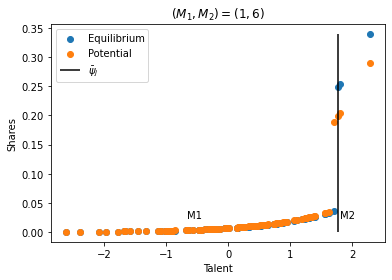

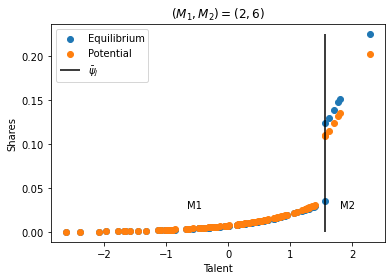

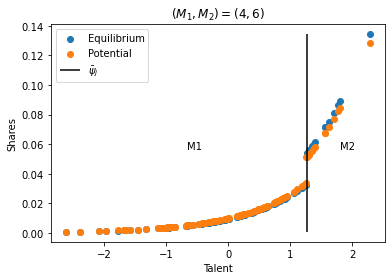

In [4]:
# plots of talent levels and market shares
# shares at threshold for no profitable deviation
plt.scatter(y=np.concatenate((sigma_dict[dev_index][0], sigma_dict[dev_index][1])),
            x=talent_thresh_vec,
            label='Equilibrium'
           )
# shares at next talent draw where there is a profitable deviation
plt.scatter(y=np.concatenate((sigma_dict[dev_index+1][0], sigma_dict[dev_index+1][1])),
            x=talent_thresh_vec,
            label='Potential'
           )
plt.xlabel('Talent')
plt.ylabel('Shares')
plt.vlines(x=talent_thresh_vec[dev_index],
           ymin=min(np.concatenate((sigma_dict[dev_index][0], sigma_dict[dev_index][1]))),
           ymax=max(np.concatenate((sigma_dict[dev_index][0], sigma_dict[dev_index][1]))),
           label=r"$\bar{\psi}_j$"
          )
plt.text(x=np.percentile(talent_thresh_vec,25),
         y=np.percentile(np.concatenate((sigma_dict[dev_index][0], 
                                         sigma_dict[dev_index][1])),
                         90
                        ),
         s='M1')
plt.text(x=np.percentile(talent_thresh_vec,99),
         y=np.percentile(np.concatenate((sigma_dict[dev_index][0], 
                                         sigma_dict[dev_index][1])),
                         90
                        ),
         s='M2')
plt.legend(loc='upper left')
plt.title(r"$(M_1,M_2)=(1,6)$")
plt.show()

# repeat plots for question 4
plt.scatter(y=np.concatenate((sigma_dict[dev26_index][0], sigma_dict[dev26_index][1])),
            x=talent_thresh_vec,
            label='Equilibrium'
           )
plt.scatter(y=np.concatenate((sigma_dict[dev26_index+1][0], sigma_dict[dev26_index+1][1])),
            x=talent_thresh_vec,
            label='Potential'
           )
plt.xlabel('Talent')
plt.ylabel('Shares')
plt.vlines(x=talent_thresh_vec[dev26_index],
           ymin=min(np.concatenate((sigma_dict[dev26_index][0], sigma_dict[dev26_index][1]))),
           ymax=max(np.concatenate((sigma_dict[dev26_index][0], sigma_dict[dev26_index][1]))),
           label=r"$\bar{\psi}_j$"
          )
plt.text(x=np.percentile(talent_thresh_vec,25),
         y=np.percentile(np.concatenate((sigma_dict[dev26_index][0], 
                                         sigma_dict[dev26_index][1])),
                         90
                        ),
         s='M1')
plt.text(x=np.percentile(talent_thresh_vec,99),
         y=np.percentile(np.concatenate((sigma_dict[dev26_index][0], 
                                         sigma_dict[dev26_index][1])),
                         90
                        ),
         s='M2')
plt.legend(loc='upper left')
plt.title(r"$(M_1,M_2)=(2,6)$")
plt.show()

plt.scatter(y=np.concatenate((sigma_dict[dev46_index][0], sigma_dict[dev46_index][1])),
            x=talent_thresh_vec,
            label='Equilibrium'
           )
plt.scatter(y=np.concatenate((sigma_dict[dev46_index+1][0], sigma_dict[dev46_index+1][1])),
            x=talent_thresh_vec,
            label='Potential'
           )
plt.xlabel('Talent')
plt.ylabel('Shares')
plt.vlines(x=talent_thresh_vec[dev46_index],
           ymin=min(np.concatenate((sigma_dict[dev46_index][0], sigma_dict[dev46_index][1]))),
           ymax=max(np.concatenate((sigma_dict[dev46_index][0], sigma_dict[dev46_index][1]))),
           label=r"$\bar{\psi}_j$"
          )
plt.text(x=np.percentile(talent_thresh_vec,25),
         y=np.percentile(np.concatenate((sigma_dict[dev46_index][0], 
                                         sigma_dict[dev46_index][1])),
                         90
                        ),
         s='M1')
plt.text(x=np.percentile(talent_thresh_vec,99),
         y=np.percentile(np.concatenate((sigma_dict[dev46_index][0], 
                                         sigma_dict[dev46_index][1])),
                         90
                        ),
         s='M2')
plt.legend(loc='upper left')
plt.title(r"$(M_1,M_2)=(4,6)$")
plt.show()